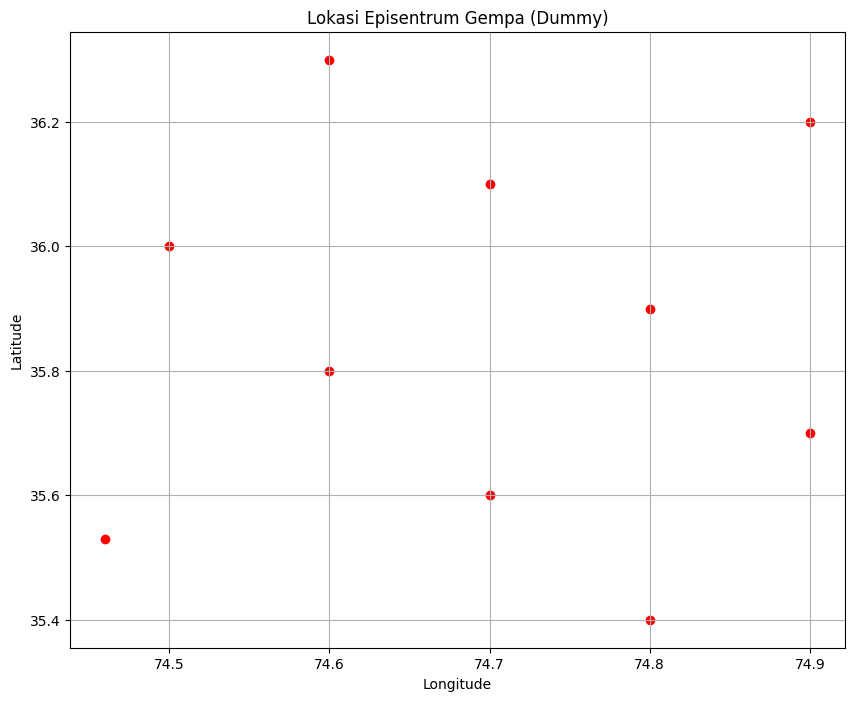

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Lokasi episentrum gempa
locations = np.array([
    [35.40, 74.80],
    [35.53, 74.46],
    [35.60, 74.70],
    [35.70, 74.90],
    [35.80, 74.60],
    [35.90, 74.80],
    [36.00, 74.50],
    [36.10, 74.70],
    [36.20, 74.90],
    [36.30, 74.60]
])

# Plot peta lokasi episentrum gempa
plt.figure(figsize=(10, 8))
plt.scatter(locations[:, 1], locations[:, 0], color='red', marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Lokasi Episentrum Gempa (Dummy)')
plt.grid(True)
plt.show()


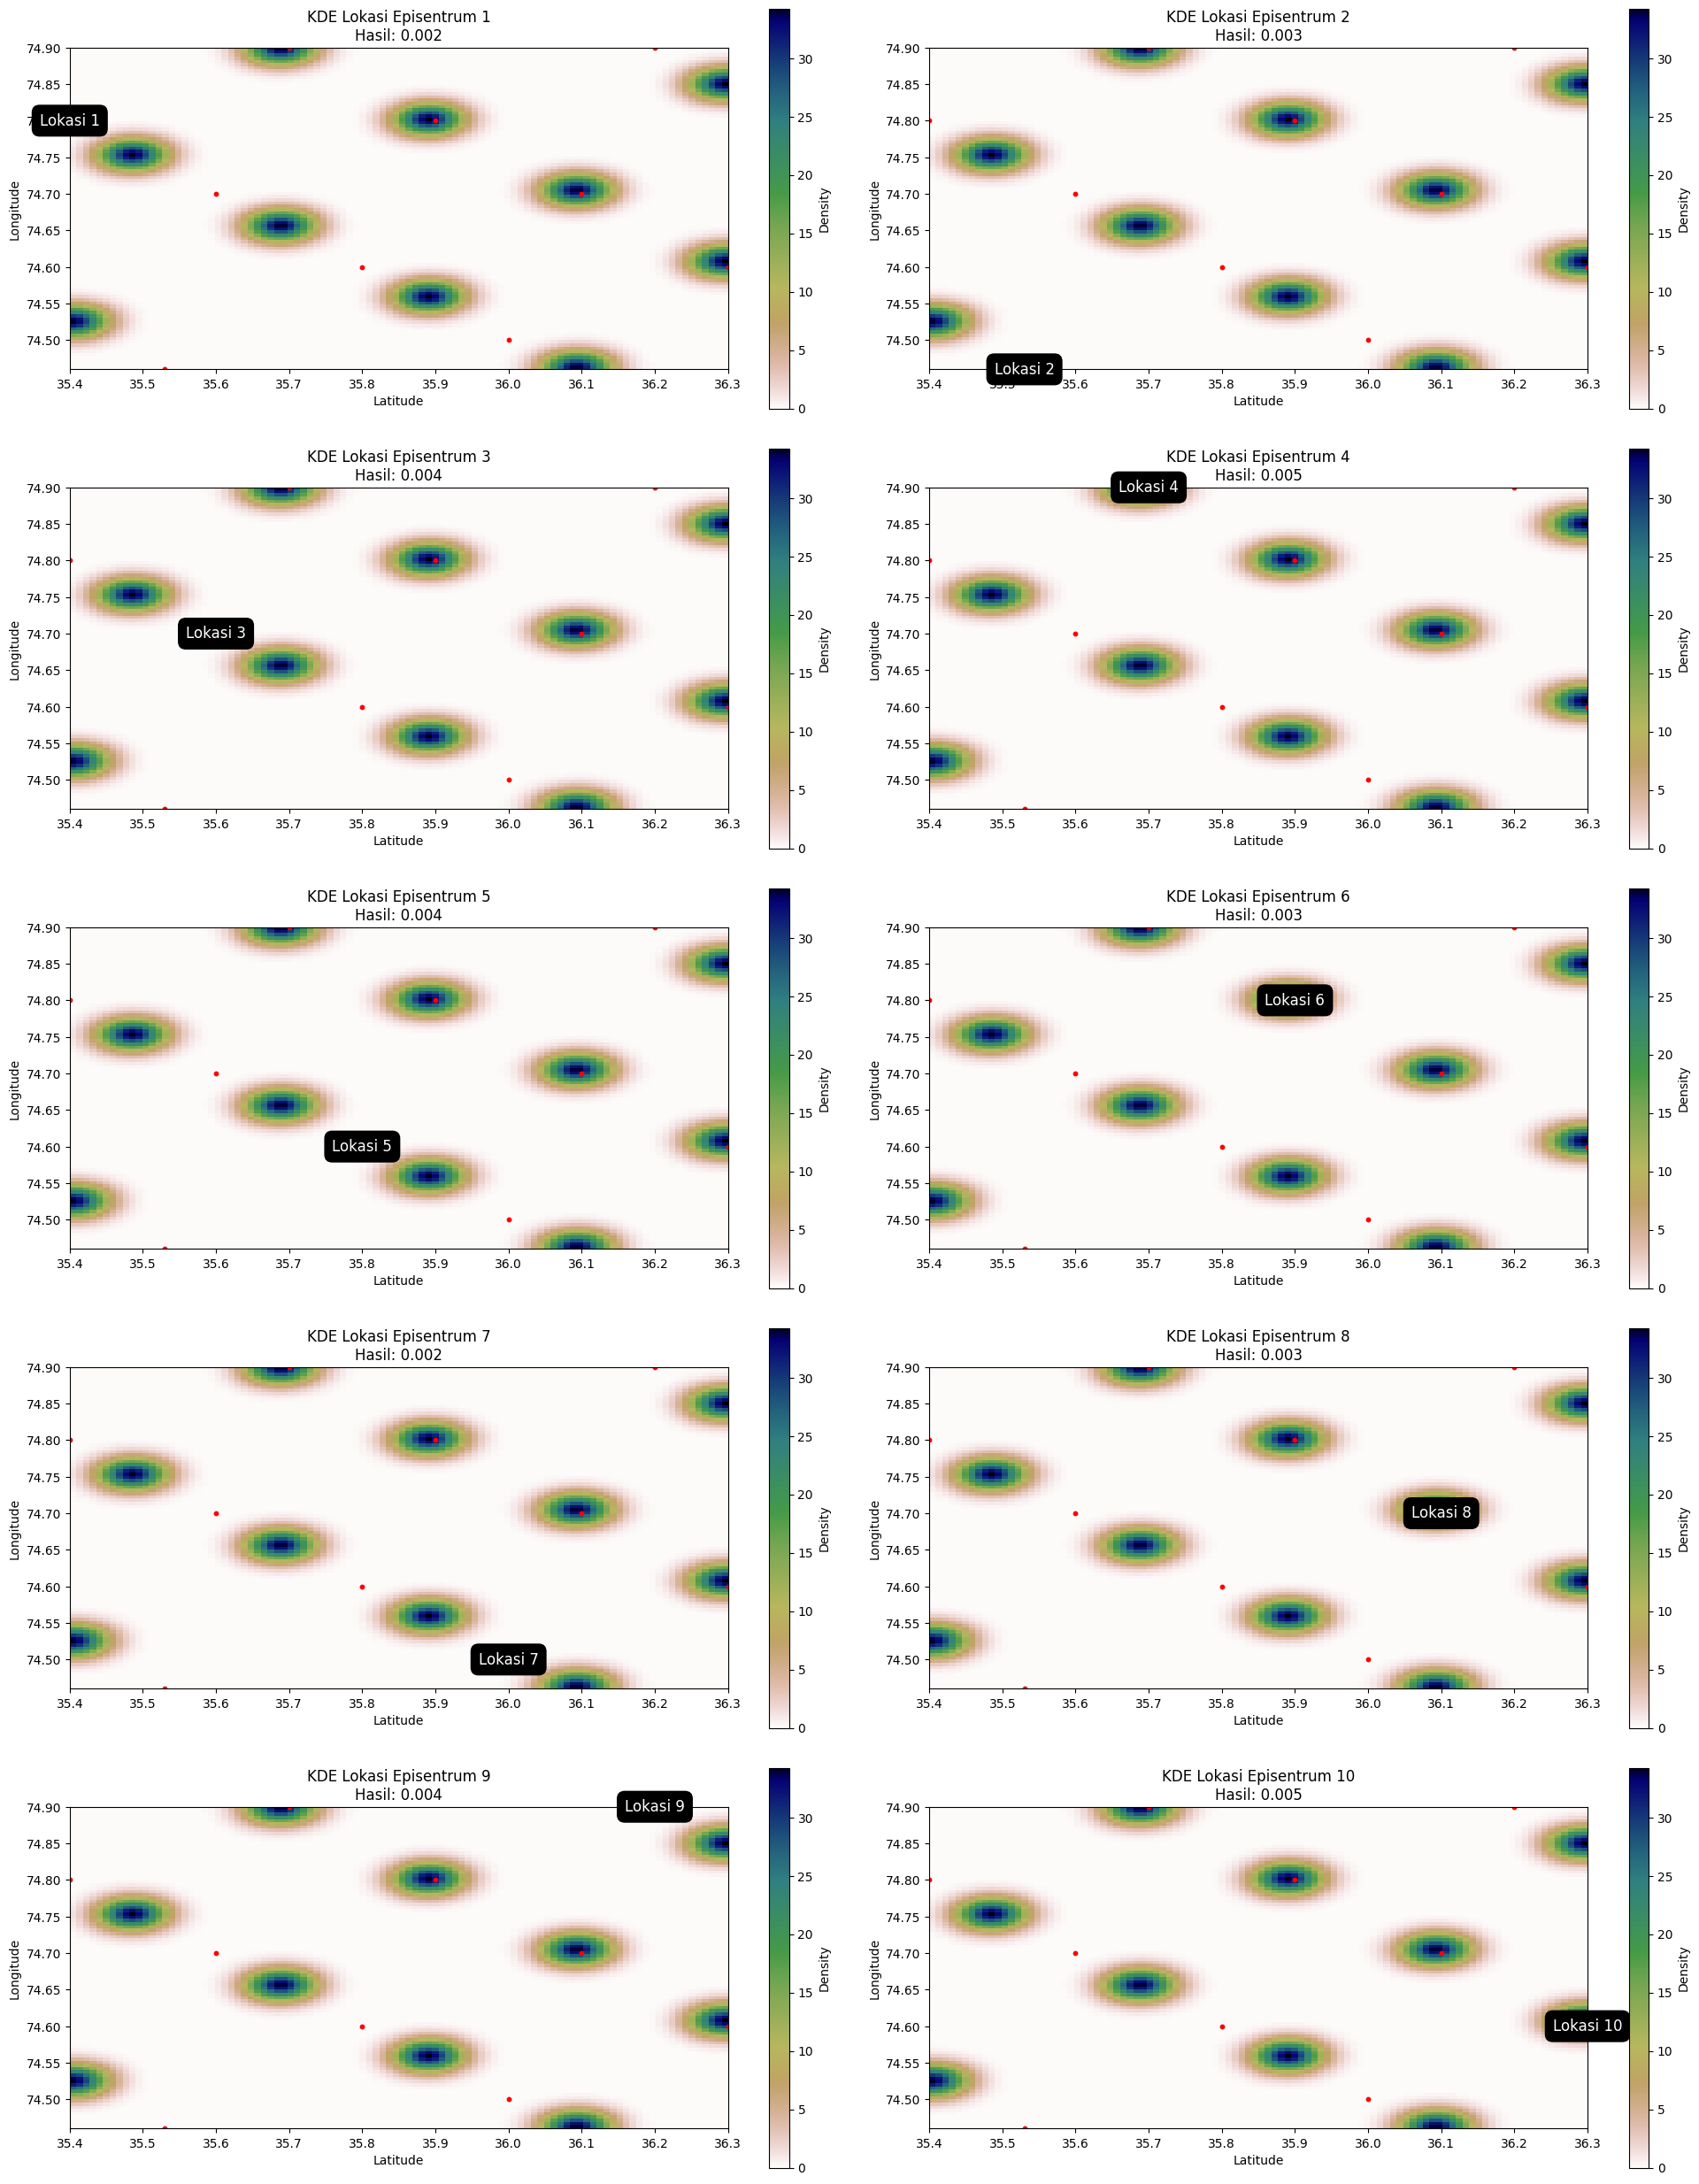

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Lokasi episentrum gempa
locations = np.array([
    [35.40, 74.80],
    [35.53, 74.46],
    [35.60, 74.70],
    [35.70, 74.90],
    [35.80, 74.60],
    [35.90, 74.80],
    [36.00, 74.50],
    [36.10, 74.70],
    [36.20, 74.90],
    [36.30, 74.60]
])

# Plot KDE untuk setiap lokasi episentrum
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))

for i, ax in enumerate(axes.flatten()):
    # Perhitungan KDE menggunakan Gaussian KDE
    kde = gaussian_kde(locations.T, bw_method=0.1)
    x = np.linspace(locations[:, 0].min(), locations[:, 0].max(), 100)
    y = np.linspace(locations[:, 1].min(), locations[:, 1].max(), 100)
    X, Y = np.meshgrid(x, y)
    positions = np.vstack([X.ravel(), Y.ravel()])
    Z = np.reshape(kde(positions).T, X.shape)

    im = ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[x.min(), x.max(), y.min(), y.max()])
    ax.scatter(locations[:, 0], locations[:, 1], c='r', s=10)
    ax.set_title(f'KDE Lokasi Episentrum {i+1}\nHasil: {kde_results[i]}')
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Density')

    # Tambahkan label untuk lokasi episentrum dengan warna putih dan garis tepi hitam
    ax.text(locations[i, 0], locations[i, 1], f'Lokasi {i+1}', color='white', fontsize=12, ha='center', va='center', bbox=dict(facecolor='black', edgecolor='black', boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()
